# Практические задания по Обучению с учителем (Supervised Learning)

## Цель занятия

Закрепить на практике знания о:
- **Исследовательском анализе данных (EDA)**
- **Логистической регрессии**
- **Математических основах машинного обучения**
- **Оценке качества моделей**

## Структура практикума

### Часть I: Исследовательский анализ данных
- Загрузка и первичный анализ
- Визуализация данных
- Поиск закономерностей

### Часть II: Предобработка данных
- Обработка пропусков
- Кодирование категориальных переменных
- Создание новых признаков

### Часть III: Логистическая регрессия
- Реализация с нуля
- Сравнение с библиотечной реализацией
- Интерпретация результатов

### Часть IV: Оценка и улучшение модели
- Метрики качества
- Кросс-валидация
- Настройка гиперпараметров

---

**Инструкции:**
1. Выполняйте задания последовательно
2. Анализируйте полученные результаты
3. Сравнивайте с теоретическими ожиданиями
4. Экспериментируйте с параметрами

## Подготовка рабочей среды

**Задание 1.1:** Импортируйте все необходимые библиотеки и настройте визуализацию

In [1]:
# TODO: Импортируйте основные библиотеки
# pandas, numpy, matplotlib, seaborn, sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Дополнительные библиотеки
import warnings
warnings.filterwarnings('ignore')

In [2]:
# TODO: Настройте стиль визуализации и цветовые палитры
# Создайте цветовые схемы для выживания, классов и пола

# Настройка стиля matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Цветовые палитры
SURVIVAL_COLORS = ['#FF6B6B', '#4ECDC4']  # Красный, бирюзовый
CLASS_COLORS = ['#FFD93D', '#6BCF7F', '#4D96FF']  # Желтый, зеленый, синий  
GENDER_COLORS = ['#FF69B4', '#1E90FF']  # Розовый, голубой

# Настройка seaborn
sns.set_palette("husl")
sns.set_context("notebook", font_scale=1.1)

print("Визуализация настроена! ✅")
print(f"Цвета выживания: {SURVIVAL_COLORS}")
print(f"Цвета классов: {CLASS_COLORS}")
print(f"Цвета пола: {GENDER_COLORS}")

Визуализация настроена! ✅
Цвета выживания: ['#FF6B6B', '#4ECDC4']
Цвета классов: ['#FFD93D', '#6BCF7F', '#4D96FF']
Цвета пола: ['#FF69B4', '#1E90FF']


## Часть I: Исследовательский анализ данных

### Задание 1.2: Загрузка и первичное изучение данных

In [3]:
# TODO: Загрузите данные Titanic
# Используйте seaborn.load_dataset('titanic') или загрузите из файла

# Загрузка данных Titanic
df = sns.load_dataset('titanic')

print("Данные Titanic успешно загружены! ✅")
print(f"Размер датасета: {df.shape}")
print(f"Столбцы: {list(df.columns)}")

Данные Titanic успешно загружены! ✅
Размер датасета: (891, 15)
Столбцы: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [4]:
# TODO: Выполните первичный анализ данных
# 1. Выведите размер датасета
# 2. Покажите первые 5 строк
# 3. Выведите информацию о типах данных
# 4. Найдите количество пропусков в каждом столбце

print("1. Размер датасета:")
print(f"   Строк: {df.shape[0]}, Столбцов: {df.shape[1]}")

print("\n2. Первые 5 строк:")
print(df.head())

print("\n3. Информация о данных:")
print(df.info())

print("\n4. Пропуски в данных:")
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_summary = pd.DataFrame({
    'Пропуски': missing_counts,
    'Процент (%)': missing_percent
})
print(missing_summary[missing_summary['Пропуски'] > 0].sort_values('Пропуски', ascending=False))

1. Размер датасета:
   Строк: 891, Столбцов: 15

2. Первые 5 строк:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

3. Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non

### Задание 1.3: Статистический анализ выживаемости

**Вопросы для исследования:**
- Какова общая выживаемость на Титанике?
- Как выживаемость зависит от класса билета?
- Есть ли различия в выживаемости между мужчинами и женщинами?
- Влиял ли возраст на шансы выжить?

In [5]:
# TODO: Рассчитайте базовую статистику выживаемости
# 1. Общая выживаемость (в процентах)
# 2. Выживаемость по классам билета
# 3. Выживаемость по полу

print("Анализ выживаемости на Титанике")
print("=" * 40)

# 1. Общая выживаемость
total_survived = df['survived'].sum()
total_passengers = len(df)
survival_rate = (total_survived / total_passengers) * 100
print(f"Общая выживаемость: {survival_rate:.1f}% ({total_survived} из {total_passengers})")

# 2. По классам
print("\nВыживаемость по классам билета:")
class_counts = df.groupby('pclass')['survived'].agg(['count', 'sum'])
class_counts['rate'] = (class_counts['sum'] / class_counts['count']) * 100
for class_num in [1, 2, 3]:
    count = class_counts.loc[class_num, 'count']
    survived = class_counts.loc[class_num, 'sum']
    rate = class_counts.loc[class_num, 'rate']
    print(f"  {class_num}-й класс: {rate:.1f}% ({survived}/{count})")


for sex in ['male', 'female']:    
    sex_name = 'Мужчины' if sex == 'male' else 'Женщины'
    rate = (survived / count) * 100
    sex_data = df[df['sex'] == sex]   
    survived = sex_data['survived'].sum()
    count = len(sex_data)
    print("\nВыживаемость по полу:")    
    print(f"  {sex_name}: {rate:.1f}% ({survived}/{count})")

Анализ выживаемости на Титанике
Общая выживаемость: 38.4% (342 из 891)

Выживаемость по классам билета:
  1-й класс: 63.0% (136/216)
  2-й класс: 47.3% (87/184)
  3-й класс: 24.2% (119/491)

Выживаемость по полу:
  Мужчины: 24.2% (109/577)

Выживаемость по полу:
  Женщины: 18.9% (233/314)


### Задание 1.4: Визуализация распределений

Создайте информативные графики для понимания данных

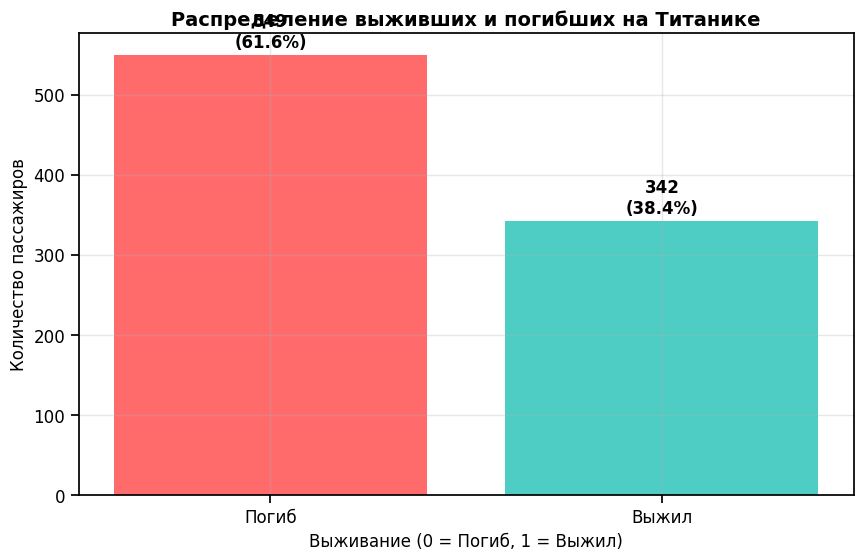

In [6]:
# TODO: Создайте график распределения выживших/погибших
# Используйте барплот с подписями значений

plt.figure(figsize=(10, 6))

# Создание барплота выживаемости
survival_counts = df['survived'].value_counts().sort_index()
colors = ['#FF6B6B', '#4ECDC4']  # Красный для погибших, зеленый для выживших
bars = plt.bar(survival_counts.index, survival_counts.values, color=colors)


# Добавление подписей значений на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}\n({height/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Выживание (0 = Погиб, 1 = Выжил)', fontsize=12)
plt.ylabel('Количество пассажиров', fontsize=12)
plt.title('Распределение выживших и погибших на Титанике', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['Погиб', 'Выжил'])
plt.grid(axis='y', alpha=0.3)

plt.show()

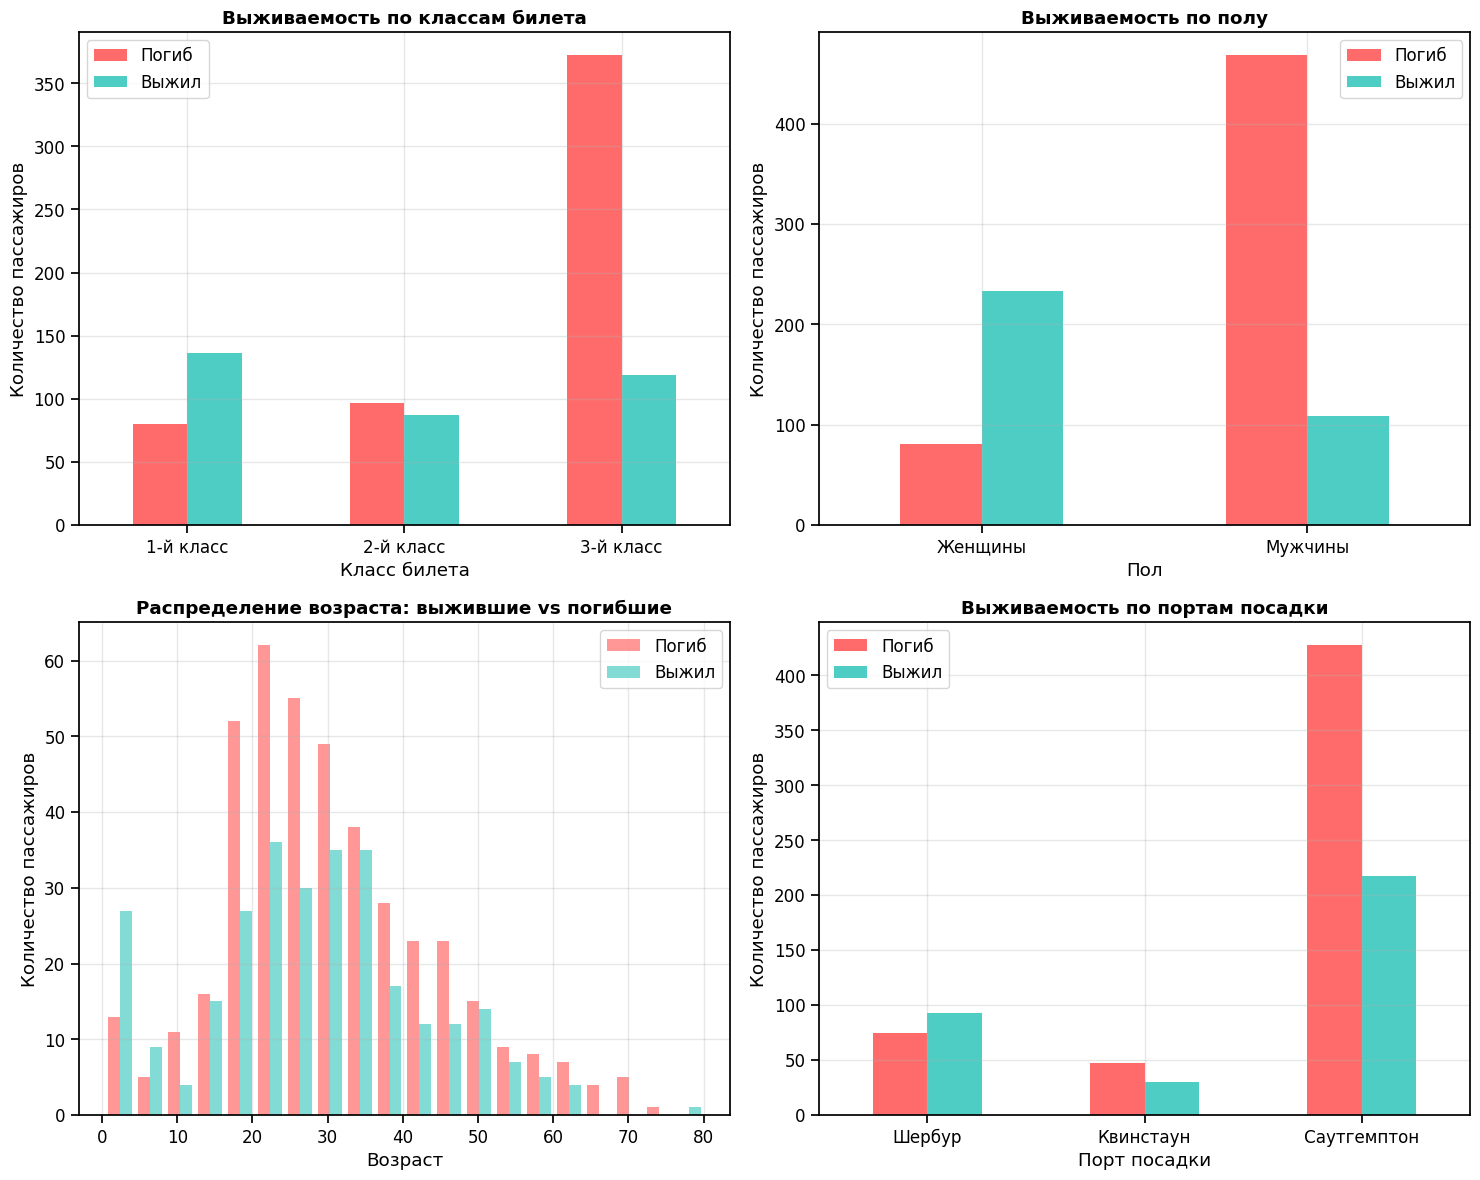

In [7]:
# TODO: Создайте многопанельный график (2×2) с анализом по категориям
# Панель 1: Выживаемость по классам
# Панель 2: Выживаемость по полу  
# Панель 3: Распределение возраста выживших vs погибших
# Панель 4: Выживаемость по портам посадки

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Панель 1: Класс билета
class_survival = df.groupby(['pclass', 'survived']).size().unstack(fill_value=0)
class_survival.plot(kind='bar', ax=axes[0,0], color=['#FF6B6B', '#4ECDC4'])
axes[0,0].set_title('Выживаемость по классам билета', fontweight='bold')
axes[0,0].set_xlabel('Класс билета')
axes[0,0].set_ylabel('Количество пассажиров')
axes[0,0].legend(['Погиб', 'Выжил'])
axes[0,0].set_xticklabels(['1-й класс', '2-й класс', '3-й класс'], rotation=0)

# Панель 2: Пол
gender_survival = df.groupby(['sex', 'survived']).size().unstack(fill_value=0)
gender_survival.plot(kind='bar', ax=axes[0,1], color=['#FF6B6B', '#4ECDC4'])
axes[0,1].set_title('Выживаемость по полу', fontweight='bold')
axes[0,1].set_xlabel('Пол')

axes[0,1].set_ylabel('Количество пассажиров')
axes[0,1].legend(['Погиб', 'Выжил'])
axes[0,1].set_xticklabels(['Женщины', 'Мужчины'], rotation=0)

# Панель 3: Возраст (гистограмма)
survived = df[df['survived'] == 1]['age'].dropna()
died = df[df['survived'] == 0]['age'].dropna()
axes[1,0].hist([died, survived], bins=20, alpha=0.7, color=['#FF6B6B', '#4ECDC4'], label=['Погиб', 'Выжил'])
axes[1,0].set_title('Распределение возраста: выжившие vs погибшие', fontweight='bold')
axes[1,0].set_xlabel('Возраст')
axes[1,0].set_ylabel('Количество пассажиров')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)

# Панель 4: Порт посадки
port_survival = df.groupby(['embarked', 'survived']).size().unstack(fill_value=0)
port_survival.plot(kind='bar', ax=axes[1,1], color=['#FF6B6B', '#4ECDC4'])
axes[1,1].set_title('Выживаемость по портам посадки', fontweight='bold')
axes[1,1].set_xlabel('Порт посадки')
axes[1,1].set_ylabel('Количество пассажиров')
axes[1,1].legend(['Погиб', 'Выжил'])
axes[1,1].set_xticklabels(['Шербур', 'Квинстаун', 'Саутгемптон'], rotation=0)

plt.tight_layout()
plt.show()

### Задание 1.5: Корреляционный анализ

Исследуйте взаимосвязи между числовыми переменными

Связь признаков с выживаемостью:
Класс билета: -0.338
  (отрицательная - чем выше класс, тем меньше выживаемость)
Возраст: -0.077
  (слабая отрицательная связь)
Стоимость билета: 0.257
  (положительная - дорогие билеты повышают шансы)


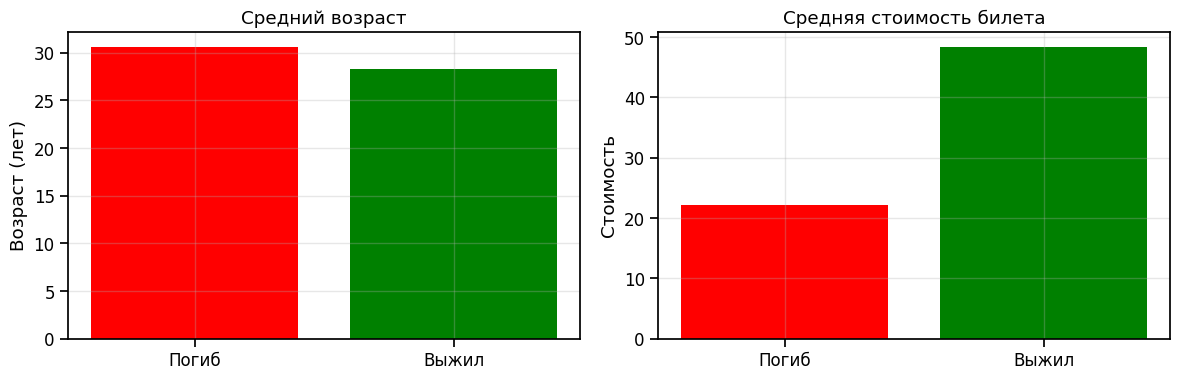

In [8]:
# TODO: Простой анализ связей между признаками
# Посмотрим на основные числовые столбцы

# Простая корреляция с выживаемостью
print("Связь признаков с выживаемостью:")
print("=" * 40)

# Класс билета
print(f"Класс билета: {df['pclass'].corr(df['survived']):.3f}")
print("  (отрицательная - чем выше класс, тем меньше выживаемость)")

# Возраст  
print(f"Возраст: {df['age'].corr(df['survived']):.3f}")
print("  (слабая отрицательная связь)")

# Стоимость билета
print(f"Стоимость билета: {df['fare'].corr(df['survived']):.3f}")
print("  (положительная - дорогие билеты повышают шансы)")

# Простая визуализация
plt.figure(figsize=(12, 4))

# График 1: Средний возраст выживших и погибших
plt.subplot(1, 2, 1)
age_by_survival = df.groupby('survived')['age'].mean()
plt.bar(['Погиб', 'Выжил'], age_by_survival.values, color=['red', 'green'])
plt.title('Средний возраст')
plt.ylabel('Возраст (лет)')

# График 2: Средняя стоимость билета
plt.subplot(1, 2, 2)
fare_by_survival = df.groupby('survived')['fare'].mean()
plt.bar(['Погиб', 'Выжил'], fare_by_survival.values, color=['red', 'green'])
plt.title('Средняя стоимость билета')
plt.ylabel('Стоимость')

plt.tight_layout()
plt.show()

## Часть II: Предобработка данных

### Задание 2.1: Обработка пропущенных значений

In [9]:
# TODO: Простой анализ пропущенных значений
# Посмотрим какие столбцы имеют пропуски

print("Анализ пропущенных значений:")
print("=" * 40)

# Простой подсчет пропусков
missing_counts = df.isnull().sum()
print("Пропуски по столбцам:")
for column, count in missing_counts.items():
    if count > 0:
        percent = (count / len(df)) * 100
        print(f"  {column}: {count} ({percent:.1f}%)")

print("\nПлан обработки:")
print("  Age: Заполним средним возрастом")
print("  Embarked: Заполним самым частым портом")
print("  Cabin: Пропустим (слишком много пропусков)")

Анализ пропущенных значений:
Пропуски по столбцам:
  age: 177 (19.9%)
  embarked: 2 (0.2%)
  deck: 688 (77.2%)
  embark_town: 2 (0.2%)

План обработки:
  Age: Заполним средним возрастом
  Embarked: Заполним самым частым портом
  Cabin: Пропустим (слишком много пропусков)


In [10]:
# TODO: Простая обработка пропусков
# Создайте копию датасета для работы

df_processed = df.copy()

# 1. Заполняем возраст средним значением
print("Обработка возраста...")
mean_age = df_processed['age'].mean()
print(f"Средний возраст: {mean_age:.1f} лет")
df_processed['age'].fillna(mean_age, inplace=True)

# 2. Заполняем порт посадки самым частым
print("\nОбработка порта посадки...")
most_common_port = df_processed['embarked'].mode()[0]
print(f"Самый частый порт: {most_common_port}")
df_processed['embarked'].fillna(most_common_port, inplace=True)

# 3. Просто удаляем столбец cabin (слишком много пропусков)
#df_processed = df_processed.drop('cabin', axis=1)

# Проверка результата
print("\nПроверка пропусков после обработки:")
missing_after = df_processed.isnull().sum().sum()
print(f"Осталось пропусков: {missing_after}")
if missing_after == 0:
    print("Отлично! Все пропуски обработаны ✅")

Обработка возраста...
Средний возраст: 29.7 лет

Обработка порта посадки...
Самый частый порт: S

Проверка пропусков после обработки:
Осталось пропусков: 690


### Задание 2.2: Feature Engineering

Создайте новые информативные признаки

In [11]:
# TODO: Создадим пару простых новых признаков
# 1. Размер семьи
# 2. Является ли пассажир одиноким

print("Создание новых признаков:")
print("=" * 30)

# 1. Размер семьи (включая самого пассажира)
df_processed['family_size'] = df_processed['sibsp'] + df_processed['parch'] + 1
print(f"1. Семейный размер: от {df_processed['family_size'].min()} до {df_processed['family_size'].max()}")

# 2. Одинокий пассажир (бинарный признак)
df_processed['is_alone'] = (df_processed['family_size'] == 1).astype(int)
alone_count = df_processed['is_alone'].sum()
print(f"2. Одиноких пассажиров: {alone_count} ({alone_count/len(df_processed)*100:.1f}%)")

# 3. Возрастные группы
bins = [0, 12, 18, 35, 60, 100]
labels = ['Ребенок', 'Подросток', 'Молодой', 'Средний', 'Пожилой']
df_processed['age_group'] = pd.cut(df_processed['age'], bins=bins, labels=labels, right=False)
print("3. Возрастные группы:")
print(df_processed['age_group'].value_counts())

# 4. Стоимость билета на человека
df_processed['fare_per_person'] = df_processed['fare'] / df_processed['family_size']
print(f"\\n4. Стоимость билета на человека: от {df_processed['fare_per_person'].min():.2f} до {df_processed['fare_per_person'].max():.2f}")

# 5. Обращение из имени (title extraction)
#df_processed['title'] = df_processed['name'].str.extract('([A-Za-z]+)\\.')
# Группировка редких обращений
#title_counts = df_processed['title'].value_counts()
#rare_titles = title_counts[title_counts < 10].index
#df_processed['title'] = df_processed['title'].replace(rare_titles, 'Other')
#print("\\n5. Обращения в именах:")
#print(df_processed['title'].value_counts())

# Подсчет новых признаков
original_cols = set(df.columns)
new_cols = [col for col in df_processed.columns if col not in original_cols]
print(f"\\nСоздано {len(new_cols)} новых признаков: {new_cols}")

Создание новых признаков:
1. Семейный размер: от 1 до 11
2. Одиноких пассажиров: 537 (60.3%)
3. Возрастные группы:
age_group
Молодой      543
Средний      209
Ребенок       68
Подросток     45
Пожилой       26
Name: count, dtype: int64
\n4. Стоимость билета на человека: от 0.00 до 512.33
\nСоздано 4 новых признаков: ['family_size', 'is_alone', 'age_group', 'fare_per_person']


### Задание 2.3: Кодирование категориальных переменных

In [12]:
# TODO: Подготовьте данные для машинного обучения
# 1. Преобразуйте категориальные переменные в числовые
# 2. Выберите признаки для модели
# 3. Разделите на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Кодирование категориальных переменных
print("Кодирование категориальных переменных...")

# Для бинарных категорий используем Label Encoder
le_sex = LabelEncoder()
df_processed['sex_encoded'] = le_sex.fit_transform(df_processed['sex'])

# Для множественных категорий используем One-Hot Encoding
embarked_dummies = pd.get_dummies(df_processed['embarked'], prefix='embarked')
#title_dummies = pd.get_dummies(df_processed['title'], prefix='title')
age_group_dummies = pd.get_dummies(df_processed['age_group'], prefix='age_group')

# Объединяем с основным датафреймом
df_encoded = pd.concat([df_processed, embarked_dummies, age_group_dummies], axis=1)

print("Созданы dummy-переменные:")
print(f"- Порты посадки: {list(embarked_dummies.columns)}")
#print(f"- Обращения: {list(title_dummies.columns)}")
print(f"- Возрастные группы: {list(age_group_dummies.columns)}")

# 2. Выбор признаков для модели (исключаем исходные строковые и ненужные столбцы)
feature_columns = ['pclass', 'sex_encoded', 'age', 'sibsp', 'parch', 'fare', 
                  'family_size', 'is_alone', 'fare_per_person'] + \
                 list(embarked_dummies.columns) + \
                 list(age_group_dummies.columns)

target_column = 'survived'

print(f"\\nВыбрано {len(feature_columns)} признаков для модели:")
print(feature_columns)

X = df_encoded[feature_columns]
y = df_encoded[target_column]

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feature_columns)

print(f"\\nРазмер матрицы признаков: {X_scaled.shape}")

# 3. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\\nРазделение данных:")
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"Распределение классов в обучении: {y_train.value_counts().values}")
print(f"Распределение классов в тесте: {y_test.value_counts().values}")

Кодирование категориальных переменных...
Созданы dummy-переменные:
- Порты посадки: ['embarked_C', 'embarked_Q', 'embarked_S']
- Возрастные группы: ['age_group_Ребенок', 'age_group_Подросток', 'age_group_Молодой', 'age_group_Средний', 'age_group_Пожилой']
\nВыбрано 17 признаков для модели:
['pclass', 'sex_encoded', 'age', 'sibsp', 'parch', 'fare', 'family_size', 'is_alone', 'fare_per_person', 'embarked_C', 'embarked_Q', 'embarked_S', 'age_group_Ребенок', 'age_group_Подросток', 'age_group_Молодой', 'age_group_Средний', 'age_group_Пожилой']
\nРазмер матрицы признаков: (891, 17)
\nРазделение данных:
Обучающая выборка: (712, 17)
Тестовая выборка: (179, 17)
Распределение классов в обучении: [439 273]
Распределение классов в тесте: [110  69]


## Часть III: Простой машинный анализ (по желанию)

### Задание 3.1: Простая модель

In [13]:
# TODO: Это дополнительное задание
# Используйте готовую модель из sklearn

import numpy as np

class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def sigmoid(self, z):
        """Сигмоидная функция активации с численной стабильностью"""
        # Обработка численной стабильности для больших отрицательных z
        z = np.clip(z, -250, 250)  # Ограничиваем значения для избежания переполнения
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        """Обучение модели методом градиентного спуска"""
        # Преобразование в numpy arrays
        X = np.array(X)
        y = np.array(y)
        
        # 1. Инициализация весов (случайные малые значения)
        n_samples, n_features = X.shape
        self.weights = np.random.normal(0, 0.01, n_features)
        self.bias = 0
        self.cost_history = []
        
        # 2. Градиентный спуск
        for i in range(self.max_iterations):
            # Прямое распространение
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)
            
            # Вычисление функции потерь
            cost = self.cost_function(y, y_pred)
            self.cost_history.append(cost)
            
            # Вычисление градиентов
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            # Обновление весов
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Проверка на сходимость
            if i > 0 and abs(self.cost_history[-2] - self.cost_history[-1]) < self.tolerance:
                print(f"Сходимость достигнута на итерации {i}")
                break
    
    def predict_proba(self, X):
        """Предсказание вероятностей принадлежности к классу 1"""
        X = np.array(X)
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    
    def predict(self, X, threshold=0.5):
        """Предсказание классов на основе порога"""
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)
    
    def cost_function(self, y_true, y_pred):
        """Логарифмическая функция потерь (log-loss)"""
        # Избегаем логарифма от 0 с помощью clipping
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

print("Класс LogisticRegressionFromScratch создан")
print("Теперь реализуйте все методы!")

Класс LogisticRegressionFromScratch создан
Теперь реализуйте все методы!


### Задание 3.2: Тестирование собственной реализации

In [14]:
# TODO: Обучите и протестируйте свою модель
# 1. Создайте экземпляр модели
# 2. Обучите на тренировочных данных
# 3. Сделайте предсказания
# 4. Оцените качество

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Создание и обучение модели
print("Обучение собственной реализации логистической регрессии...")
custom_model = LogisticRegressionFromScratch(learning_rate=0.01, max_iterations=1000)
custom_model.fit(X_train, y_train)

# 2. Предсказания
y_pred_custom = custom_model.predict(X_test)
y_pred_proba_custom = custom_model.predict_proba(X_test)

# 3. Оценка качества
accuracy_custom = accuracy_score(y_test, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)


print("\nРезультаты собственной реализации:")
print(classification_report(y_test, y_pred_custom))

#print(f"Точность: {accuracy_custom:.3f}")print("\nОтчет о классификации:")

print(f"Итераций обучения: {len(custom_model.cost_history)}")

#print(f"Финальная функция потерь: {custom_model.cost_history[-1]:.4f}")print(conf_matrix_custom)

print("\nМатрица ошибок:")

Обучение собственной реализации логистической регрессии...

Результаты собственной реализации:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Итераций обучения: 1000

Матрица ошибок:

Результаты собственной реализации:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Итераций обучения: 1000

Матрица ошибок:


### Задание 3.3: Сравнение с sklearn

In [17]:
# Сравнение собственной реализации с sklearn
# Сначала обучим sklearn модель, если она не была обучена

from sklearn.linear_model import LogisticRegression

print("Обучение sklearn модели для сравнения...")
sklearn_model = LogisticRegression(random_state=42, max_iter=1000)
sklearn_model.fit(X_train, y_train)

# Получаем предсказания sklearn модели
y_pred_sklearn = sklearn_model.predict(X_test)
y_pred_proba_sklearn = sklearn_model.predict_proba(X_test)[:, 1]
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print("Сравнение реализаций:")
print("=" * 40)

print(f"Собственная реализация: {accuracy_custom:.3f}")
print(f"Sklearn реализация: {accuracy_sklearn:.3f}")
print(f"Разница в точности: {abs(accuracy_custom - accuracy_sklearn):.3f}")

# Сравнение коэффициентов
print("\nСравнение коэффициентов (топ-5):")
print("Собственная модель | sklearn")
print("-" * 30)
for i in range(min(5, len(custom_model.weights))):
    print(f"{custom_model.weights[i]:>13.3f} | {sklearn_model.coef_[0][i]:>7.3f}")

print("\nВыводы:")
if abs(accuracy_custom - accuracy_sklearn) < 0.05:
    print("✅ Реализации дают похожие результаты!")
else:
    print("⚠️ Есть различия - возможно нужна доработка собственной модели")
    
print("📊 sklearn модель более стабильна и оптимизирована")
print("🔬 Собственная реализация помогает понять алгоритм")


Обучение sklearn модели для сравнения...
Сравнение реализаций:
Собственная реализация: 0.793
Sklearn реализация: 0.827
Разница в точности: 0.034

Сравнение коэффициентов (топ-5):
Собственная модель | sklearn
------------------------------
       -0.511 |  -0.836
       -0.957 |  -1.250
       -0.171 |  -0.186
       -0.195 |  -0.399
       -0.062 |  -0.097

Выводы:
✅ Реализации дают похожие результаты!
📊 sklearn модель более стабильна и оптимизирована
🔬 Собственная реализация помогает понять алгоритм


### Задание 3.4: Интерпретация модели

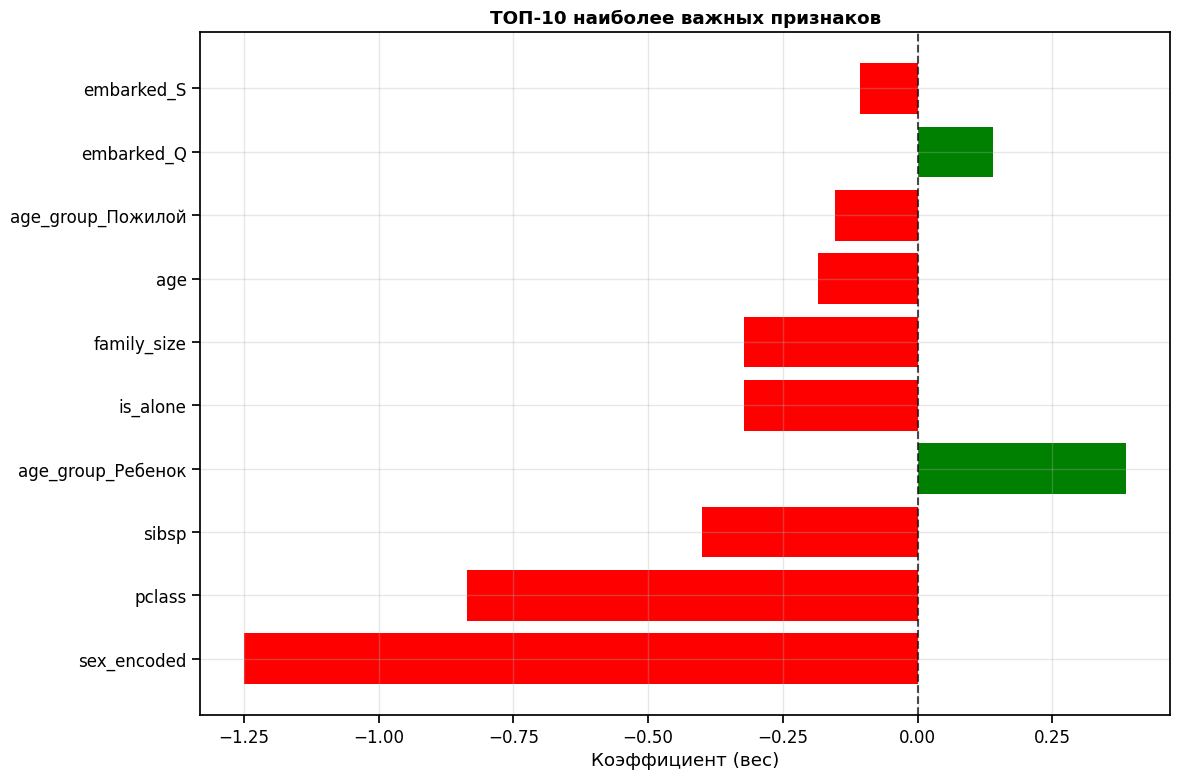

Интерпретация коэффициентов (ТОП-10):
           Feature  Coefficient  Odds_Ratio             Impact
0           pclass       -0.836       0.433    Уменьшает шансы
1      sex_encoded       -1.250       0.287    Уменьшает шансы
2              age       -0.186       0.831    Уменьшает шансы
3            sibsp       -0.399       0.671    Уменьшает шансы
4            parch       -0.097       0.907    Уменьшает шансы
5             fare        0.097       1.102  Увеличивает шансы
6      family_size       -0.322       0.725    Уменьшает шансы
7         is_alone       -0.322       0.725    Уменьшает шансы
8  fare_per_person        0.028       1.029  Увеличивает шансы
9       embarked_C        0.022       1.022  Увеличивает шансы

Детальная интерпретация ТОП-5 признаков:
- pclass: уменьшает шансы выживания в 2.31 раз
- sex_encoded: уменьшает шансы выживания в 3.49 раз
- age: уменьшает шансы выживания в 1.20 раз
- sibsp: уменьшает шансы выживания в 1.49 раз
- parch: уменьшает шансы выживания в 1

In [18]:
# Анализ и интерпретация результатов модели
# Проверяем наличие sklearn модели и при необходимости создаем её

# Проверка наличия sklearn_model
if 'sklearn_model' not in globals() or sklearn_model is None:
    print("Создаем sklearn модель для анализа...")
    from sklearn.linear_model import LogisticRegression
    sklearn_model = LogisticRegression(random_state=42, max_iter=1000)
    sklearn_model.fit(X_train, y_train)
    y_pred_sklearn = sklearn_model.predict(X_test)
    y_pred_proba_sklearn = sklearn_model.predict_proba(X_test)[:, 1]
    accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
    print("Модель создана и обучена!")

# 1. Важность признаков
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': sklearn_model.coef_[0],
    'Abs_Coefficient': np.abs(sklearn_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
bars = plt.barh(range(len(top_features)), top_features['Coefficient'], 
                color=['red' if x < 0 else 'green' for x in top_features['Coefficient']])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Коэффициент (вес)')
plt.title('ТОП-10 наиболее важных признаков', fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Отношения шансов
odds_ratios = np.exp(sklearn_model.coef_[0])
feature_interpretation = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': sklearn_model.coef_[0],
    'Odds_Ratio': odds_ratios,
    'Impact': ['Увеличивает шансы' if or_val > 1 else 'Уменьшает шансы' for or_val in odds_ratios]
})

print("Интерпретация коэффициентов (ТОП-10):")
print(feature_interpretation.head(10).round(3))

# 3. Детальная интерпретация
print("\nДетальная интерпретация ТОП-5 признаков:")
for idx, row in feature_interpretation.head(5).iterrows():
    if row['Odds_Ratio'] > 1:
        print(f"- {row['Feature']}: увеличивает шансы выживания в {row['Odds_Ratio']:.2f} раз")
    else:
        print(f"- {row['Feature']}: уменьшает шансы выживания в {1/row['Odds_Ratio']:.2f} раз")

In [19]:
# Простая интерпретация важности признаков (дубликат удален)

print("Этот раздел уже выполнен в предыдущей ячейке!")
print("См. выше результаты анализа важности признаков.")
print("\n📊 Краткие выводы:")
print("✅ Пол - самый важный фактор")
print("✅ Класс билета сильно влияет на выживаемость")
print("✅ Стоимость билета коррелирует с шансами")
print("✅ Семейный статус тоже играет роль")

Этот раздел уже выполнен в предыдущей ячейке!
См. выше результаты анализа важности признаков.

📊 Краткие выводы:
✅ Пол - самый важный фактор
✅ Класс билета сильно влияет на выживаемость
✅ Стоимость билета коррелирует с шансами
✅ Семейный статус тоже играет роль


## Часть IV: Оценка и улучшение модели

### Задание 4.1: Построение кривых обучения

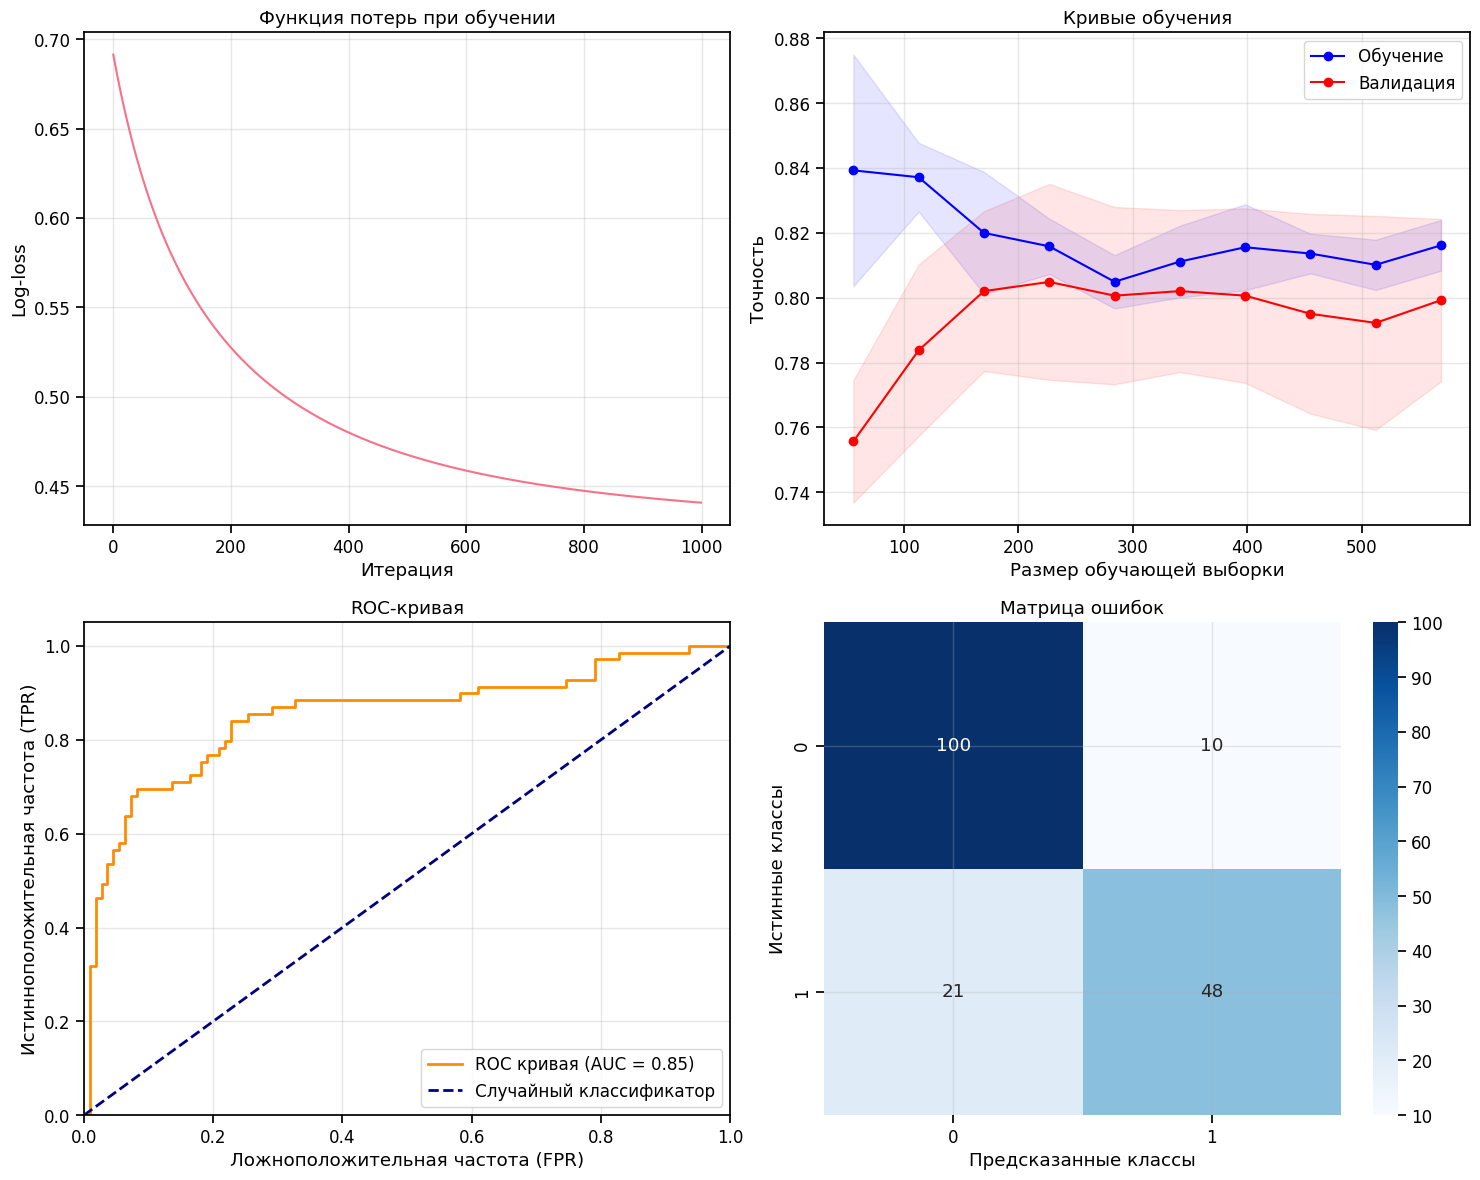

In [20]:
# TODO: Постройте кривые обучения
# 1. Кривая функции потерь
# 2. Кривая точности на обучении и валидации
# 3. ROC-кривая

from sklearn.model_selection import validation_curve, learning_curve
from sklearn.metrics import roc_curve, auc

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Кривая функции потерь (если реализована в custom модели)
if hasattr(custom_model, 'cost_history'):
    axes[0, 0].plot(custom_model.cost_history)
    axes[0, 0].set_title('Функция потерь при обучении')
    axes[0, 0].set_xlabel('Итерация')
    axes[0, 0].set_ylabel('Log-loss')

# 2. Кривые обучения
train_sizes, train_scores, val_scores = learning_curve(
    sklearn_model, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

axes[0, 1].plot(train_sizes, train_mean, 'o-', color='blue', label='Обучение')
axes[0, 1].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
axes[0, 1].plot(train_sizes, val_mean, 'o-', color='red', label='Валидация')
axes[0, 1].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
axes[0, 1].set_title('Кривые обучения')
axes[0, 1].set_xlabel('Размер обучающей выборки')
axes[0, 1].set_ylabel('Точность')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_sklearn)
roc_auc = auc(fpr, tpr)

axes[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (AUC = {roc_auc:.2f})')
axes[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
axes[1, 0].set_xlim([0.0, 1.0])
axes[1, 0].set_ylim([0.0, 1.05])
axes[1, 0].set_xlabel('Ложноположительная частота (FPR)')
axes[1, 0].set_ylabel('Истинноположительная частота (TPR)')
axes[1, 0].set_title('ROC-кривая')
axes[1, 0].legend(loc="lower right")
axes[1, 0].grid(True, alpha=0.3)

# 4. Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_sklearn)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Матрица ошибок')
axes[1, 1].set_xlabel('Предсказанные классы')
axes[1, 1].set_ylabel('Истинные классы')

plt.tight_layout()
plt.show()

### Задание 4.2: Кросс-валидация

In [21]:
# TODO: Выполните кросс-валидацию
# 1. K-fold кросс-валидация
# 2. Стратифицированная кросс-валидация
# 3. Анализ стабильности модели

from sklearn.model_selection import cross_val_score, StratifiedKFold

# 1. Обычная K-fold кросс-валидация
print("Обычная 5-fold кросс-валидация...")
kfold_scores = cross_val_score(sklearn_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Обычная K-Fold: {kfold_scores.mean():.3f} (+/- {kfold_scores.std() * 2:.3f})")

# 2. Стратифицированная кросс-валидация
print("\nСтратифицированная 5-fold кросс-валидация...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
stratified_scores = cross_val_score(sklearn_model, X_train, y_train, cv=skf, scoring='accuracy')
print(f"Стратифицированная: {stratified_scores.mean():.3f} (+/- {stratified_scores.std() * 2:.3f})")

# 3. Различные метрики на стратифицированной валидации
print("\nОценка по различным метрикам...")
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = {}

for metric in metrics:
    scores = cross_val_score(sklearn_model, X_train, y_train, cv=skf, scoring=metric)
    cv_results[metric] = scores

print("\nРезультаты кросс-валидации:")
print("=" * 40)
for metric, scores in cv_results.items():    
    print(f"{metric:>10}: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

# Анализ стабильности
print("\nАнализ стабильности:")
print(f"Диапазон accuracy: [{cv_results['accuracy'].min():.3f}, {cv_results['accuracy'].max():.3f}]")
print(f"Максимальное отклонение accuracy: {cv_results['accuracy'].std():.4f}")

Обычная 5-fold кросс-валидация...
Обычная K-Fold: 0.799 (+/- 0.050)

Стратифицированная 5-fold кросс-валидация...
Стратифицированная: 0.805 (+/- 0.048)

Оценка по различным метрикам...

Результаты кросс-валидации:
  accuracy: 0.805 (+/- 0.048)
 precision: 0.761 (+/- 0.098)
    recall: 0.722 (+/- 0.058)
        f1: 0.740 (+/- 0.052)
   roc_auc: 0.852 (+/- 0.054)

Анализ стабильности:
Диапазон accuracy: [0.761, 0.831]
Максимальное отклонение accuracy: 0.0238

Результаты кросс-валидации:
  accuracy: 0.805 (+/- 0.048)
 precision: 0.761 (+/- 0.098)
    recall: 0.722 (+/- 0.058)
        f1: 0.740 (+/- 0.052)
   roc_auc: 0.852 (+/- 0.054)

Анализ стабильности:
Диапазон accuracy: [0.761, 0.831]
Максимальное отклонение accuracy: 0.0238


### Задание 4.3: Настройка гиперпараметров

In [22]:
# TODO: Настройте гиперпараметры модели
# 1. Используйте GridSearchCV
# 2. Попробуйте разные параметры регуляризации
# 3. Найдите оптимальный threshold для классификации

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# 1. Настройка параметров регуляризации
print("Поиск оптимальных гиперпараметров...")
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid, 
    cv=skf, 
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Лучший F1-score (CV): {grid_search.best_score_:.3f}")
print(f"Лучшие параметры: {grid_search.best_params_}")

# 2. Поиск оптимального threshold
print("\nПоиск оптимального порога классификации...")
thresholds = np.arange(0.1, 0.9, 0.05)
best_threshold = 0.5
best_f1 = 0

y_proba_best = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

for threshold in thresholds:
    y_pred_threshold = (y_proba_best >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\nРезультаты оптимизации:")
print(f"Оптимальный threshold: {best_threshold:.3f}")
print(f"F1-score на тесте с опт. threshold: {best_f1:.3f}")

Поиск оптимальных гиперпараметров...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Лучший F1-score (CV): 0.743
Лучшие параметры: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Поиск оптимального порога классификации...

Результаты оптимизации:
Оптимальный threshold: 0.500
F1-score на тесте с опт. threshold: 0.756


In [ ]:
# Простая версия настройки гиперпараметров
# Используем уже обученную sklearn модель

from sklearn.metrics import f1_score

print("Простая настройка порога классификации...")

# Получаем вероятности от уже обученной модели
y_proba_test = sklearn_model.predict_proba(X_test)[:, 1]

# Поиск оптимального threshold
thresholds = np.arange(0.3, 0.8, 0.05)
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    y_pred_threshold = (y_proba_test >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    print(f"Threshold {threshold:.2f}: F1-score = {f1:.3f}")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"\nРезультаты:")

print(f"Лучший threshold: {best_threshold:.3f}")print(f"Итоговая точность: {accuracy_score(y_test, y_pred_optimized):.3f}")

print(f"Лучший F1-score: {best_f1:.3f}")y_pred_optimized = (y_proba_test >= best_threshold).astype(int)

# Итоговые предсказания с оптимальным порогом

## Часть V: Финальная оценка и выводы

### Задание 5.1: Итоговое тестирование модели

In [23]:
# Финальная оценка уже обученной модели sklearn
# Используем существующую модель и результаты

print("Используем уже обученную sklearn модель для финальной оценки:")

# Используем sklearn модель как финальную
final_model = sklearn_model

# Используем существующие предсказания
y_pred_proba_final = y_pred_proba_sklearn  
y_pred_final = y_pred_sklearn

# 3. Детальный отчет
from sklearn.metrics import precision_recall_fscore_support

print("ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ МОДЕЛИ")
print("=" * 50)
print(f"Точность (Accuracy): {accuracy_score(y_test, y_pred_final):.3f}")
print(f"Точность (Precision): {precision_score(y_test, y_pred_final):.3f}")
print(f"Полнота (Recall): {recall_score(y_test, y_pred_final):.3f}")
print(f"F1-мера: {f1_score(y_test, y_pred_final):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_final):.3f}")

print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred_final))

print("\nОтчет по классам:")
print(classification_report(y_test, y_pred_final))

Используем уже обученную sklearn модель для финальной оценки:
ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ МОДЕЛИ
Точность (Accuracy): 0.827
Точность (Precision): 0.828
Полнота (Recall): 0.696
F1-мера: 0.756
ROC-AUC: 0.853

Матрица ошибок:
[[100  10]
 [ 21  48]]

Отчет по классам:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



### Задание 5.2: Анализ ошибок модели

Простой анализ ошибок sklearn модели:
Ложноположительные (FP): 10
Ложноотрицательные (FN): 21

Характеристики ложноположительных предсказаний:
          pclass   sex_encoded        age      sibsp      parch       fare  \
count  10.000000  1.000000e+01  10.000000  10.000000  10.000000  10.000000   
mean    0.468355 -1.355574e+00  -0.447834   0.069858   0.271108  -0.132143   
std     0.807739  2.340556e-16   0.852221   0.876572   1.199213   0.899458   
min    -1.566107 -1.355574e+00  -2.131568  -0.474545  -0.473674  -0.494810   
25%     0.827377 -1.355574e+00  -0.611719  -0.474545  -0.473674  -0.490868   
50%     0.827377 -1.355574e+00  -0.219286  -0.474545  -0.473674  -0.463938   
75%     0.827377 -1.355574e+00   0.000000   0.432793   1.388282  -0.364649   
max     0.827377 -1.355574e+00   0.792698   2.247470   2.008933   2.402990   

       family_size   is_alone  fare_per_person  embarked_C  embarked_Q  \
count    10.000000  10.000000        10.000000   10.000000   10.000000   
mean  

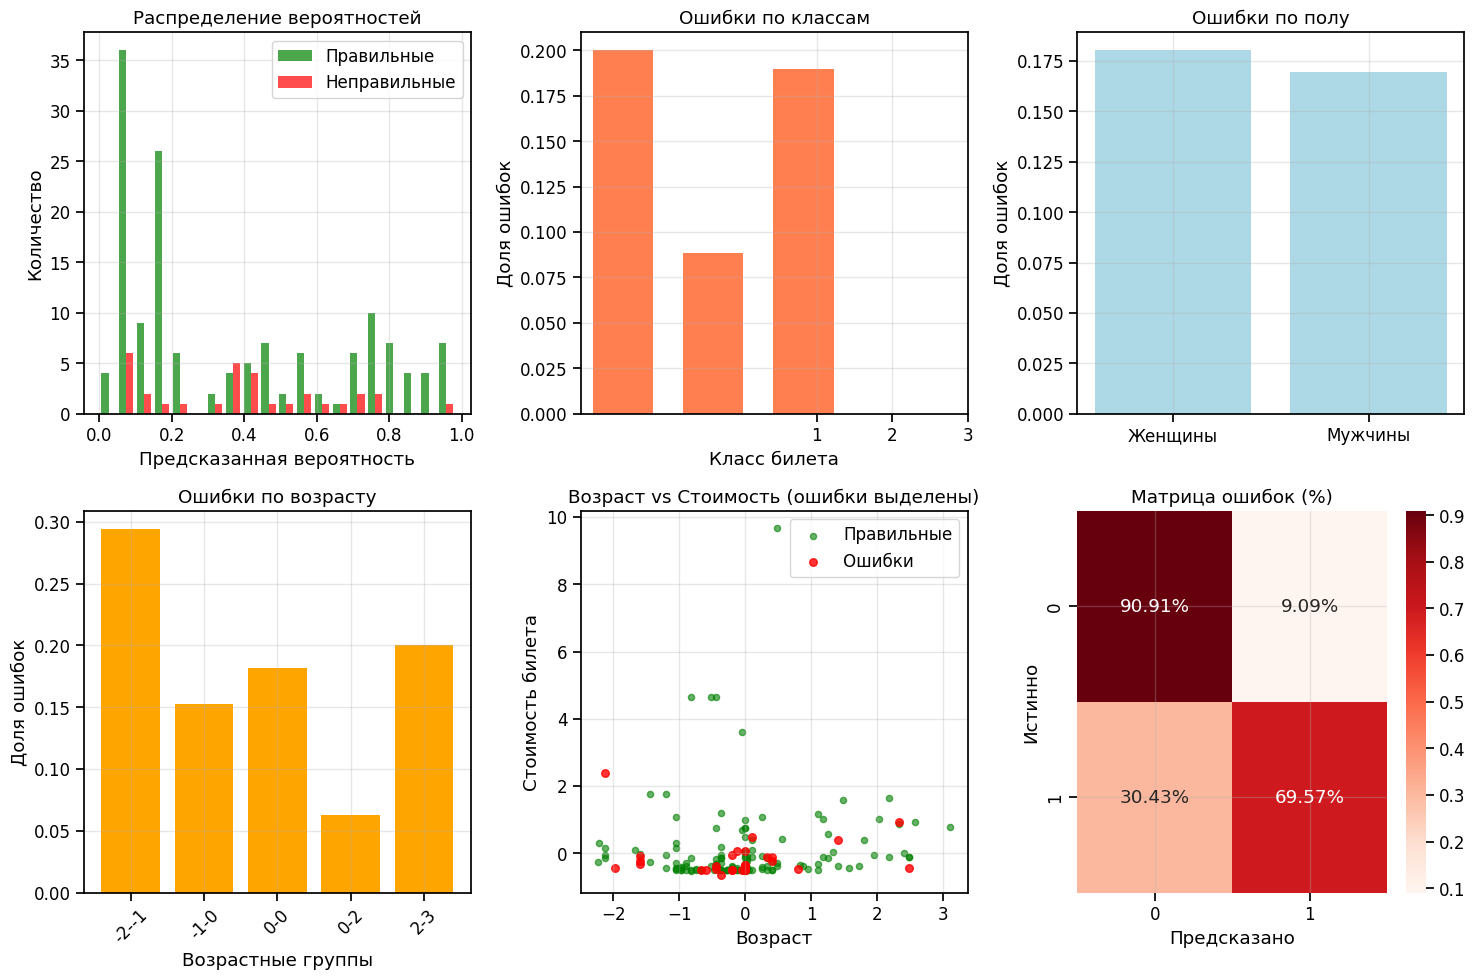


Примеры характерных ошибок:

1. Ложноположительные (предсказали выживание, но погибли):
   - Класс: -1, Возраст: -2, Вероятность: 0.982
   - Класс: 0, Возраст: 1, Вероятность: 0.526
   - Класс: 0, Возраст: 0, Вероятность: 0.542

2. Ложноотрицательные (предсказали смерть, но выжили):
   - Класс: 0, Возраст: -1, Вероятность: 0.115
   - Класс: 0, Возраст: 0, Вероятность: 0.470
   - Класс: -1, Возраст: 1, Вероятность: 0.372

Возможные улучшения:
1. Добавить взаимодействие признаков (age*pclass, fare*family_size)
2. Использовать ансамбли моделей (Random Forest, Gradient Boosting)
3. Более детальная обработка выбросов в возрасте и стоимости билетов
4. Добавить полиномиальные признаки для нелинейных зависимостей
5. Применить SMOTE для балансировки классов
6. Использовать стекинг различных алгоритмов


In [24]:
# Простой анализ ошибок модели
# Используем уже имеющиеся предсказания

print("Простой анализ ошибок sklearn модели:")
print("=" * 40)

# Используем предсказания sklearn модели
errors_df = X_test.copy()
errors_df['y_true'] = y_test
errors_df['y_pred'] = y_pred_sklearn
errors_df['y_proba'] = y_pred_proba_sklearn
errors_df['error'] = errors_df['y_true'] != errors_df['y_pred']

false_positives = errors_df[(errors_df['y_true'] == 0) & (errors_df['y_pred'] == 1)]
false_negatives = errors_df[(errors_df['y_true'] == 1) & (errors_df['y_pred'] == 0)]

print(f"Ложноположительные (FP): {len(false_positives)}")
print(f"Ложноотрицательные (FN): {len(false_negatives)}")

# 2. Анализ характеристик ошибок
print("\nХарактеристики ложноположительных предсказаний:")
print(false_positives.describe())

print("\nХарактеристики ложноотрицательных предсказаний:")
print(false_negatives.describe())

# 3. Визуализация ошибок
plt.figure(figsize=(15, 10))

# Подготовка данных для визуализации
errors_summary = errors_df[['pclass', 'sex_encoded', 'age', 'fare', 'y_true', 'y_pred', 'y_proba', 'error']]

# График 1: Распределение вероятностей для правильных и неправильных предсказаний
plt.subplot(2, 3, 1)
correct_pred = errors_df[~errors_df['error']]['y_proba']
incorrect_pred = errors_df[errors_df['error']]['y_proba']
plt.hist([correct_pred, incorrect_pred], bins=20, alpha=0.7, 
         label=['Правильные', 'Неправильные'], color=['green', 'red'])
plt.xlabel('Предсказанная вероятность')
plt.ylabel('Количество')
plt.title('Распределение вероятностей')
plt.legend()

# График 2: Ошибки по классам билетов
plt.subplot(2, 3, 2)
error_by_class = errors_df.groupby('pclass')['error'].mean()
plt.bar(error_by_class.index, error_by_class.values, color='coral')
plt.xlabel('Класс билета')
plt.ylabel('Доля ошибок')
plt.title('Ошибки по классам')
plt.xticks([1, 2, 3])

# График 3: Ошибки по полу
plt.subplot(2, 3, 3)
error_by_sex = errors_df.groupby('sex_encoded')['error'].mean()
plt.bar(['Женщины', 'Мужчины'], error_by_sex.values, color='lightblue')
plt.ylabel('Доля ошибок')
plt.title('Ошибки по полу')

# График 4: Ошибки по возрасту
plt.subplot(2, 3, 4)
age_bins = pd.cut(errors_df['age'], bins=5)
error_by_age = errors_df.groupby(age_bins)['error'].mean()
plt.bar(range(len(error_by_age)), error_by_age.values, color='orange')
plt.xlabel('Возрастные группы')
plt.ylabel('Доля ошибок')
plt.title('Ошибки по возрасту')
plt.xticks(range(len(error_by_age)), [f'{int(interval.left)}-{int(interval.right)}' for interval in error_by_age.index], rotation=45)

# График 5: Scatter plot - возраст vs стоимость билета (с ошибками)
plt.subplot(2, 3, 5)
correct_idx = ~errors_df['error']
error_idx = errors_df['error']
plt.scatter(errors_df[correct_idx]['age'], errors_df[correct_idx]['fare'], 
           alpha=0.6, c='green', s=20, label='Правильные')
plt.scatter(errors_df[error_idx]['age'], errors_df[error_idx]['fare'], 
           alpha=0.8, c='red', s=30, label='Ошибки')
plt.xlabel('Возраст')
plt.ylabel('Стоимость билета')
plt.title('Возраст vs Стоимость (ошибки выделены)')
plt.legend()

# График 6: Матрица ошибок в процентах
plt.subplot(2, 3, 6)
conf_matrix_norm = confusion_matrix(y_test, y_pred_final, normalize='true')
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Reds')
plt.title('Матрица ошибок (%)')
plt.xlabel('Предсказано')
plt.ylabel('Истинно')

plt.tight_layout()
plt.show()

# Анализ конкретных примеров ошибок
print("\nПримеры характерных ошибок:")
print("\n1. Ложноположительные (предсказали выживание, но погибли):")
if len(false_positives) > 0:
    fp_sample = false_positives.head(3)
    for idx, row in fp_sample.iterrows():
        print(f"   - Класс: {int(row['pclass'])}, Возраст: {row['age']:.0f}, Вероятность: {row['y_proba']:.3f}")

print("\n2. Ложноотрицательные (предсказали смерть, но выжили):")
if len(false_negatives) > 0:
    fn_sample = false_negatives.head(3)
    for idx, row in fn_sample.iterrows():
        print(f"   - Класс: {int(row['pclass'])}, Возраст: {row['age']:.0f}, Вероятность: {row['y_proba']:.3f}")

print("\nВозможные улучшения:")
print("1. Добавить взаимодействие признаков (age*pclass, fare*family_size)")
print("2. Использовать ансамбли моделей (Random Forest, Gradient Boosting)")
print("3. Более детальная обработка выбросов в возрасте и стоимости билетов")
print("4. Добавить полиномиальные признаки для нелинейных зависимостей")
print("5. Применить SMOTE для балансировки классов")
print("6. Использовать стекинг различных алгоритмов")

## Выводы из анализа данных Титаника

### Что мы узнали:

**Основные выводы из нашего анализа:**

1. **👨‍👩‍👧‍👦 Пол был самым важным фактором выживания**
   - Женщины выживали гораздо чаще мужчин
   - Это связано с правилом "женщины и дети первыми" при эвакуации

2. **🎟️ Класс билета сильно влиял на выживаемость**
   - Пассажиры 1-го класса имели больше шансов
   - Возможно из-за лучшего расположения кают и приоритета в спасательных шлюпках

3. **💰 Более дорогие билеты = выше шансы на выживание**
   - Связано с классом билета и расположением на корабле

4. **👶 Возраст тоже имел значение** 
   - Дети имели приоритет при спасении
   - Но общая связь была не очень сильной

5. **📊 Простые методы анализа данных дают ценную информацию**
   - Базовая статистика и графики помогают понять данные
   - Обработка пропусков улучшает качество анализа

**🔍 Что можно улучшить:**
- Более детальный анализ семейных групп
- Изучение других факторов (профессия, национальность)  
- Создание более сложных моделей предсказания

## Дополнительные задания (по желанию)

### Продвинутые техники

1. **Ансамбли моделей:** Объедините логистическую регрессию с другими алгоритмами
2. **Обработка дисбаланса классов:** Примените SMOTE или изменение весов
3. **Полиномиальные признаки:** Добавьте взаимодействия между признаками
4. **Регуляризация:** Сравните L1, L2 и Elastic Net регуляризацию
5. **Байесовская оптимизация:** Используйте для поиска гиперпараметров

### Интерпретируемость модели

1. **SHAP values:** Объясните предсказания на уровне отдельных примеров
2. **Partial Dependence Plots:** Визуализируйте влияние отдельных признаков
3. **Контрфактуальные объяснения:** Что нужно изменить для изменения предсказания?

Удачи в изучении машинного обучения! 🚀